In [2]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [5]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [6]:
df = pd.read_excel('Silver_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

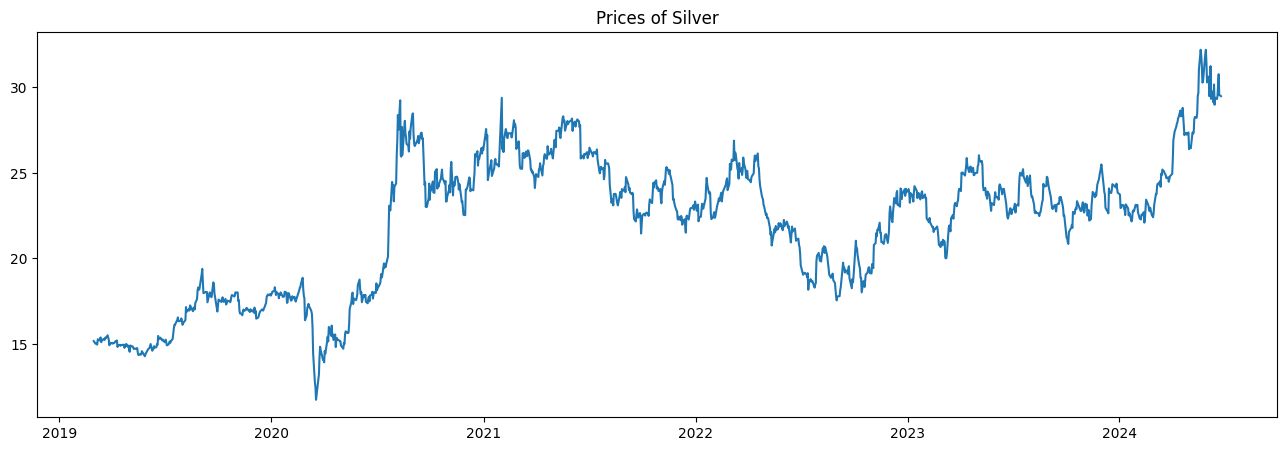

In [7]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float


# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Silver')
plt.show()

In [8]:
# Split dataset 

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.16196, saving model to save_model_7_2_1.keras
17/17 - 3s - 189ms/step - loss: 0.1620
Epoch 2/80

Epoch 2: loss improved from 0.16196 to 0.05011, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0501
Epoch 3/80

Epoch 3: loss improved from 0.05011 to 0.04922, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0492
Epoch 4/80

Epoch 4: loss improved from 0.04922 to 0.04726, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0473
Epoch 5/80

Epoch 5: loss improved from 0.04726 to 0.04164, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0416
Epoch 6/80

Epoch 6: loss did not improve from 0.04164
17/17 - 1s - 45ms/step - loss: 0.0445
Epoch 7/80

Epoch 7: loss did not improve from 0.04164
17/17 - 1s - 45ms/step - loss: 0.0457
Epoch 8/80

Epoch 8: loss improved from 0.04164 to 0.03980, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0398
Epoch 

In [13]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)


print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (836, 1)
Predicted y_train shape: (836, 1)


In [14]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [15]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.22813876570143998, 0.22496336134613504, 0.21406939216849408, 0.21421596076061533, 0.2031265046749835, 0.18881291227366603, 0.17366878004661956, 0.16736688965187985, 0.16277481086897871, 0.16668296500714463, 0.1628236360071046, 0.15813386035907973, 0.1554958586452615, 0.17181239984265972, 0.16702492732951224, 0.16468001621106387, 0.17186127156965747, 0.16951636045120966, 0.17332681772425151, 0.1737176517736173, 0.17747923731966198, 0.172838286809763, 0.18241327842493082, 0.15681483620773473, 0.1585246478195732, 0.15041524894787184, 0.1488519593392823, 0.153199819253811, 0.14592086703009377, 0.14513924552023494, 0.14020515782609422, 0.15920861905318084, 0.15305325066169007, 0.14748411004981132, 0.14640939794458274, 0.14499267692811413, 0.13654126914517273, 0.13312164592149578, 0.12882265773396484, 0.12437714754318452, 0.13605278481955618, 0.13883730853662335, 0.13087443166817092, 0.12887152946096259, 0.1306302127997988, 0.12765020217474066, 0.13404983602347542, 0.147386413184

In [17]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.18374940752983093], [0.19080151617527008], [0.19957591593265533], [0.20872509479522705], [0.21784798800945282], [0.22682584822177887], [0.2356080263853073], [0.24416516721248627], [0.25248050689697266], [0.26054710149765015], [0.2683657109737396], [0.2759426534175873], [0.28328824043273926], [0.2904154658317566], [0.2973390519618988], [0.3040749132633209], [0.3106391429901123], [0.31704795360565186], [0.3233172297477722], [0.32946184277534485], [0.33549582958221436], [0.3414321541786194], [0.34728264808654785], [0.35305774211883545], [0.3587666451931], [0.36441752314567566], [0.3700172007083893], [0.3755715787410736], [0.3810853660106659], [0.3865627348423004]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [19]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[15.49635043]
 [15.64070711]
 [15.82031909]
 [16.0076028 ]
 [16.19434844]
 [16.37812526]
 [16.55789647]
 [16.73306116]
 [16.90327618]
 [17.06839939]
 [17.22844634]
 [17.38354637]
 [17.53391055]
 [17.67980487]
 [17.8215307 ]
 [17.95941379]
 [18.09378359]
 [18.22497196]
 [18.35330405]
 [18.47908429]
 [18.60260002]
 [18.7241166 ]
 [18.84387622]
 [18.96209241]
 [19.07895366]
 [19.19462715]
 [19.30925256]
 [19.42295069]
 [19.53581793]
 [19.64793968]]


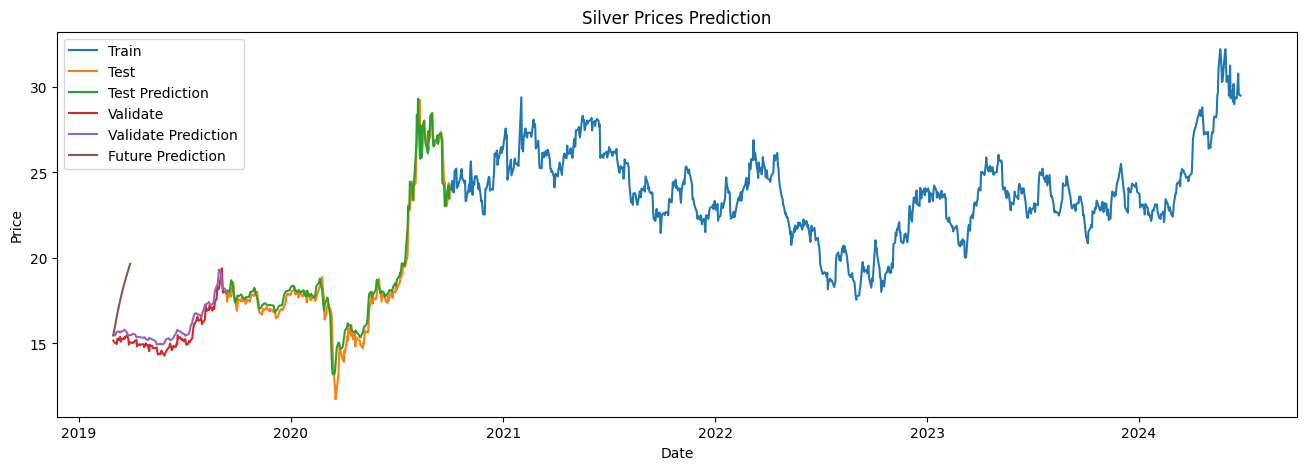

In [21]:
import matplotlib.pyplot as plt


df1 = df1.rename(columns={'close': 'Price'})

# Inverse transform lst_output
y_pred_future = sc.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Create a DataFrame for future predictions
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price'])
PREDICTIONS_FUTURE['date'] = datelist_future
PREDICTIONS_FUTURE.set_index('date', inplace=True)

# Define data for plotting
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Plotting
plt.figure(figsize=(16, 5))

# Plot training data
plt.plot(train_data.index, train_data['Price'], label='Train')

# Plot test data and its prediction
plt.plot(test_data.index, test_data['Price'], label='Test')
plt.plot(test_data.index, y_test_predict, label='Test Prediction')

# Plot validation data and its prediction
plt.plot(val_data.index, val_data['Price'], label='Validate')
plt.plot(val_data.index, y_val_predict, label='Validate Prediction')

# Plot future predictions
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['price'], label='Future Prediction')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend()
plt.show()


In [22]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.4961777269170522
MAPE:  2.742682245552396
RMSE:  0.7045478693607206

** Validate **
MAE:  0.4518602795071069
MAPE:  2.92979315479397
RMSE:  0.49624110904651353


In [23]:
# Split dataset 6-3-1

In [24]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [25]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [26]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.20794, saving model to save_model_6_3_1.keras
15/15 - 3s - 188ms/step - loss: 0.2079
Epoch 2/80

Epoch 2: loss improved from 0.20794 to 0.05998, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0600
Epoch 3/80

Epoch 3: loss improved from 0.05998 to 0.05765, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0577
Epoch 4/80

Epoch 4: loss improved from 0.05765 to 0.04822, saving model to save_model_6_3_1.keras
15/15 - 1s - 47ms/step - loss: 0.0482
Epoch 5/80

Epoch 5: loss did not improve from 0.04822
15/15 - 1s - 44ms/step - loss: 0.0514
Epoch 6/80

Epoch 6: loss improved from 0.04822 to 0.04614, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0461
Epoch 7/80

Epoch 7: loss improved from 0.04614 to 0.04555, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0456
Epoch 8/80

Epoch 8: loss improved from 0.04555 to 0.04349, saving model to save_model_6_3_1.keras


In [28]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [29]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [30]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [31]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.22813876570143998, 0.22496336134613504, 0.21406939216849408, 0.21421596076061533, 0.2031265046749835, 0.18881291227366603, 0.17366878004661956, 0.16736688965187985, 0.16277481086897871, 0.16668296500714463, 0.1628236360071046, 0.15813386035907973, 0.1554958586452615, 0.17181239984265972, 0.16702492732951224, 0.16468001621106387, 0.17186127156965747, 0.16951636045120966, 0.17332681772425151, 0.1737176517736173, 0.17747923731966198, 0.172838286809763, 0.18241327842493082, 0.15681483620773473, 0.1585246478195732, 0.15041524894787184, 0.1488519593392823, 0.153199819253811, 0.14592086703009377, 0.14513924552023494, 0.14020515782609422, 0.15920861905318084, 0.15305325066169007, 0.14748411004981132, 0.14640939794458274, 0.14499267692811413, 0.13654126914517273, 0.13312164592149578, 0.12882265773396484, 0.12437714754318452, 0.13605278481955618, 0.13883730853662335, 0.13087443166817092, 0.12887152946096259, 0.1306302127997988, 0.12765020217474066, 0.13404983602347542, 0.147386413184

In [32]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.18914316594600677], [0.19444142282009125], [0.2022237330675125], [0.210712730884552], [0.21904999017715454], [0.22694577276706696], [0.2343469113111496], [0.24127265810966492], [0.247758150100708], [0.2538416087627411], [0.25956228375434875], [0.2649591267108917], [0.2700691521167755], [0.27492642402648926], [0.27956077456474304], [0.28399762511253357], [0.2882584035396576], [0.2923603951931], [0.2963178753852844], [0.3001420795917511], [0.303842157125473], [0.30742523074150085], [0.31089717149734497], [0.3142625391483307], [0.31752514839172363], [0.3206879496574402], [0.32375362515449524], [0.3267243206501007], [0.329601913690567], [0.3323879837989807]]


In [33]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[15.60676067]
 [15.715216  ]
 [15.87451991]
 [16.04828972]
 [16.21895343]
 [16.38058012]
 [16.53208144]
 [16.67385149]
 [16.80660953]
 [16.93113794]
 [17.04824017]
 [17.15871356]
 [17.26331579]
 [17.36274415]
 [17.45760932]
 [17.54843166]
 [17.6356498 ]
 [17.71961758]
 [17.80062721]
 [17.87890868]
 [17.95464927]
 [18.0279948 ]
 [18.09906543]
 [18.16795452]
 [18.23474013]
 [18.29948268]
 [18.36223707]
 [18.42304721]
 [18.48195155]
 [18.53898241]]


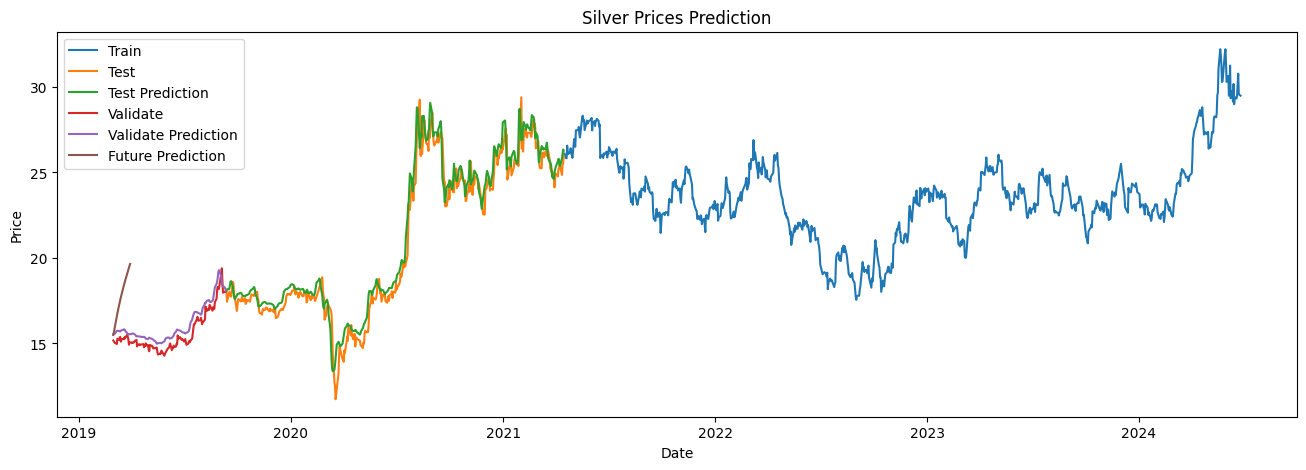

In [34]:
plt.figure(figsize=(16, 5))

# Plot the training data
plt.plot(train_data.index, train_data['Price'], label='Train')  

# Plot the test data and its predictions
plt.plot(test_data.index, test_data['Price'], label='Test') 
plt.plot(test_data.index, y_test_predict, label='Test Prediction')

# Plot the validation data and its predictions
plt.plot(val_data.index, val_data['Price'], label='Validate')  
plt.plot(val_data.index, y_val_predict, label='Validate Prediction')

# Plot the future predictions
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['price'], label='Future Prediction')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend()
plt.show()


In [35]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.6082780723857165
MAPE:  3.060343977027269
RMSE:  0.8015334617345816

** Validate **
MAE:  0.5366290339717155
MAPE:  3.463770162700523
RMSE:  0.5795654518195223


In [36]:
# Split dataset 5-3-2 

In [37]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [38]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [39]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [40]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19044, saving model to save_model_5_3_2.keras
12/12 - 3s - 240ms/step - loss: 0.1904
Epoch 2/80

Epoch 2: loss improved from 0.19044 to 0.06386, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0639
Epoch 3/80

Epoch 3: loss improved from 0.06386 to 0.05106, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0511
Epoch 4/80

Epoch 4: loss improved from 0.05106 to 0.04815, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0482
Epoch 5/80

Epoch 5: loss improved from 0.04815 to 0.04757, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0476
Epoch 6/80

Epoch 6: loss did not improve from 0.04757
12/12 - 1s - 45ms/step - loss: 0.0477
Epoch 7/80

Epoch 7: loss did not improve from 0.04757
12/12 - 1s - 44ms/step - loss: 0.0476
Epoch 8/80

Epoch 8: loss did not improve from 0.04757
12/12 - 1s - 44ms/step - loss: 0.0504
Epoch 9/80

Epoch 9: loss improved from 0.04757 to

In [41]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [42]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [43]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [44]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.22813876570143998, 0.22496336134613504, 0.21406939216849408, 0.21421596076061533, 0.2031265046749835, 0.18881291227366603, 0.17366878004661956, 0.16736688965187985, 0.16277481086897871, 0.16668296500714463, 0.1628236360071046, 0.15813386035907973, 0.1554958586452615, 0.17181239984265972, 0.16702492732951224, 0.16468001621106387, 0.17186127156965747, 0.16951636045120966, 0.17332681772425151, 0.1737176517736173, 0.17747923731966198, 0.172838286809763, 0.18241327842493082, 0.15681483620773473, 0.1585246478195732, 0.15041524894787184, 0.1488519593392823, 0.153199819253811, 0.14592086703009377, 0.14513924552023494, 0.14020515782609422, 0.15920861905318084, 0.15305325066169007, 0.14748411004981132, 0.14640939794458274, 0.14499267692811413, 0.13654126914517273, 0.13312164592149578, 0.12882265773396484, 0.12437714754318452, 0.13605278481955618, 0.13883730853662335, 0.13087443166817092, 0.12887152946096259, 0.1306302127997988, 0.12765020217474066, 0.13404983602347542, 0.147386413184

In [45]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.16851471364498138], [0.17019324004650116], [0.1723395586013794], [0.1745395064353943], [0.1766391545534134], [0.17860709130764008], [0.18045572936534882], [0.1822083741426468], [0.18388858437538147], [0.18551753461360931], [0.18711349368095398], [0.18869157135486603], [0.19026343524456024], [0.19183778762817383], [0.19342048466205597], [0.19501517713069916], [0.19662387669086456], [0.19824738800525665], [0.19988571107387543], [0.2015385627746582], [0.20320525765419006], [0.20488525927066803], [0.20657804608345032], [0.2082832306623459], [0.21000048518180847], [0.21172961592674255], [0.21347056329250336], [0.21522332727909088], [0.21698787808418274], [0.21876439452171326]]


In [46]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[15.18449621]
 [15.21885565]
 [15.2627908 ]
 [15.30782373]
 [15.35080353]
 [15.3910872 ]
 [15.42892883]
 [15.46480547]
 [15.49919938]
 [15.53254399]
 [15.56521328]
 [15.59751653]
 [15.62969259]
 [15.66191959]
 [15.6943174 ]
 [15.72696076]
 [15.75989084]
 [15.79312412]
 [15.8266606 ]
 [15.86049447]
 [15.89461172]
 [15.92900136]
 [15.96365271]
 [15.99855784]
 [16.03371004]
 [16.06910536]
 [16.10474255]
 [16.14062163]
 [16.17674199]
 [16.21310729]]


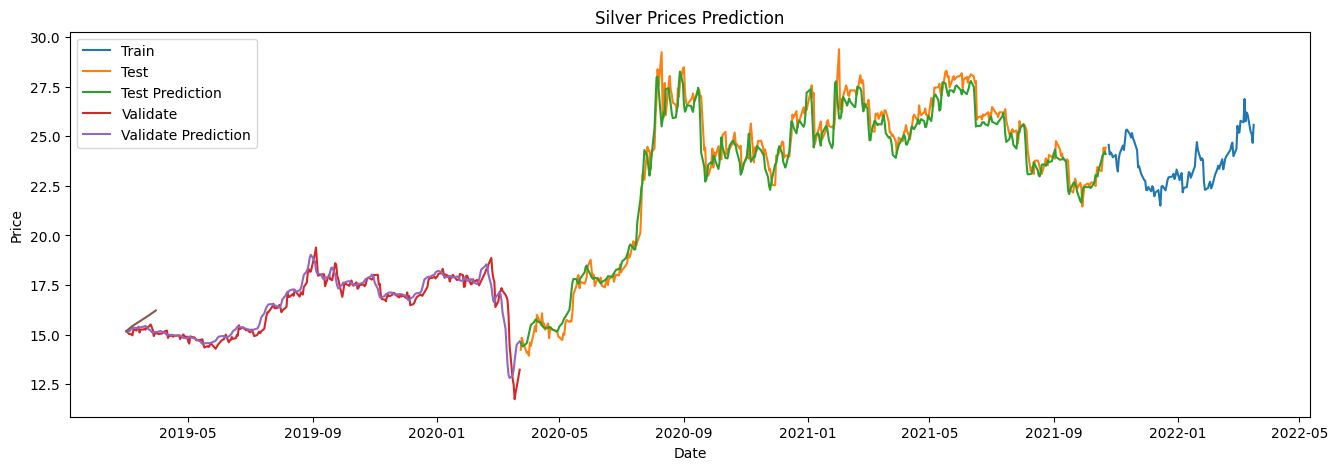

In [47]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [48]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.5246960456829118
MAPE:  2.2192837407139816
RMSE:  0.7138889858448285

** Validate **
MAE:  0.31358279399017774
MAPE:  1.9489992860985679
RMSE:  0.5349830223273456


In [49]:
import pandas as pd

# Dữ liệu cho các tỷ lệ
data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [22.4012, 25.2609, 21.0500],
    "Testing MAPE": [1.3820, 1.5072, 1.1532],
    "Testing RMSE": [29.3413, 32.0959, 28.0738],
    "Validation MAE": [46.4422, 47.4360, 33.8017],
    "Validation MAPE": [3.4789, 3.5405, 2.4095],
    "Validation RMSE": [50.1242, 50.8019, 41.2469],
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Hiển thị bảng
print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      22.4012        1.3820       29.3413         46.4422           3.4789          50.1242
 LSTM 6-3-1      25.2609        1.5072       32.0959         47.4360           3.5405          50.8019
 LSTM 5-3-2      21.0500        1.1532       28.0738         33.8017           2.4095          41.2469
